# Model Comparison - Pipeline Condition Classification
## TASK 5: Baseline Evaluation - Performance Comparison

**Date:** December 30, 2025  
**Models Compared:** Logistic Regression, Random Forest, XGBoost  
**Metrics:** Accuracy, Precision, Recall, F1-Score  
**Problem Type:** Multi-class Classification

---
## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')

✓ Libraries loaded


---
## Load Predictions from All Models

In [2]:
# Load predictions from each model
try:
    lr_pred = pd.read_csv('logistic_regression_predictions.csv')
    print('✓ Loaded Logistic Regression predictions')
except:
    print('⚠ Logistic Regression predictions not found')
    lr_pred = None

try:
    rf_pred = pd.read_csv('random_forest_predictions.csv')
    print('✓ Loaded Random Forest predictions')
except:
    print('⚠ Random Forest predictions not found')
    rf_pred = None

try:
    xgb_pred = pd.read_csv('xgboost_predictions.csv')
    print('✓ Loaded XGBoost predictions')
except:
    print('⚠ XGBoost predictions not found')
    xgb_pred = None

✓ Loaded Logistic Regression predictions
✓ Loaded Random Forest predictions
✓ Loaded XGBoost predictions


In [3]:
# Load class names
import json
try:
    with open('target_mapping.json', 'r') as f:
        target_mapping = json.load(f)
    class_names = [k for k, v in sorted(target_mapping.items(), key=lambda x: x[1])]
    print(f'\nClass names: {class_names}')
except:
    class_names = ['Class_0', 'Class_1', 'Class_2']
    print(f'\nUsing default class names: {class_names}')


Using default class names: ['Class_0', 'Class_1', 'Class_2']


---
## Calculate Classification Metrics

In [4]:
# Function to calculate all metrics
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_Macro': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall_Macro': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1_Macro': f1_score(y_true, y_pred, average='macro', zero_division=0),
        'Precision_Weighted': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall_Weighted': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1_Weighted': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    return metrics

print('✓ Metric calculation function defined')

✓ Metric calculation function defined


In [5]:
# Calculate metrics for all models
all_metrics = []

if lr_pred is not None:
    lr_metrics = calculate_metrics(lr_pred['True_Label'], lr_pred['Predicted_Label'], 'Logistic Regression')
    all_metrics.append(lr_metrics)

if rf_pred is not None:
    rf_metrics = calculate_metrics(rf_pred['True_Label'], rf_pred['Predicted_Label'], 'Random Forest')
    all_metrics.append(rf_metrics)

if xgb_pred is not None:
    xgb_metrics = calculate_metrics(xgb_pred['True_Label'], xgb_pred['Predicted_Label'], 'XGBoost')
    all_metrics.append(xgb_metrics)

# Create comparison DataFrame
metrics_df = pd.DataFrame(all_metrics)

print('✓ Metrics calculated for all models')

✓ Metrics calculated for all models


---
## Model Comparison Table

In [6]:
# Display comparison table
print('='*90)
print('MODEL PERFORMANCE COMPARISON')
print('='*90)
print('\nOverall Metrics:')
print('-'*90)

display_df = metrics_df[['Model', 'Accuracy', 'Precision_Macro', 'Recall_Macro', 'F1_Macro']].copy()
display_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

# Round to 4 decimals
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    display_df[col] = display_df[col].round(4)

print(display_df.to_string(index=False))

# Highlight best model
best_model_idx = display_df['Accuracy'].idxmax()
best_model = display_df.loc[best_model_idx, 'Model']
best_accuracy = display_df.loc[best_model_idx, 'Accuracy']

print('\n' + '='*90)
print(f'🏆 BEST MODEL: {best_model} (Accuracy: {best_accuracy:.4f})')
print('='*90)

MODEL PERFORMANCE COMPARISON

Overall Metrics:
------------------------------------------------------------------------------------------
              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression     0.935     0.9380  0.9232    0.9300
      Random Forest     0.995     0.9945  0.9922    0.9933
            XGBoost     0.995     0.9945  0.9922    0.9933

🏆 BEST MODEL: Random Forest (Accuracy: 0.9950)


---
## Per-Class Performance

In [7]:
# Calculate per-class metrics for each model
print('\n' + '='*90)
print('PER-CLASS PERFORMANCE COMPARISON')
print('='*90)

for i, class_name in enumerate(class_names):
    print(f'\n{class_name}:')
    print('-'*60)
    
    class_metrics = []
    
    if lr_pred is not None:
        lr_prec = precision_score(lr_pred['True_Label'], lr_pred['Predicted_Label'], 
                                 labels=[i], average=None, zero_division=0)[0]
        lr_rec = recall_score(lr_pred['True_Label'], lr_pred['Predicted_Label'], 
                             labels=[i], average=None, zero_division=0)[0]
        lr_f1 = f1_score(lr_pred['True_Label'], lr_pred['Predicted_Label'], 
                        labels=[i], average=None, zero_division=0)[0]
        class_metrics.append(['Logistic Regression', lr_prec, lr_rec, lr_f1])
    
    if rf_pred is not None:
        rf_prec = precision_score(rf_pred['True_Label'], rf_pred['Predicted_Label'], 
                                 labels=[i], average=None, zero_division=0)[0]
        rf_rec = recall_score(rf_pred['True_Label'], rf_pred['Predicted_Label'], 
                             labels=[i], average=None, zero_division=0)[0]
        rf_f1 = f1_score(rf_pred['True_Label'], rf_pred['Predicted_Label'], 
                        labels=[i], average=None, zero_division=0)[0]
        class_metrics.append(['Random Forest', rf_prec, rf_rec, rf_f1])
    
    if xgb_pred is not None:
        xgb_prec = precision_score(xgb_pred['True_Label'], xgb_pred['Predicted_Label'], 
                                  labels=[i], average=None, zero_division=0)[0]
        xgb_rec = recall_score(xgb_pred['True_Label'], xgb_pred['Predicted_Label'], 
                              labels=[i], average=None, zero_division=0)[0]
        xgb_f1 = f1_score(xgb_pred['True_Label'], xgb_pred['Predicted_Label'], 
                         labels=[i], average=None, zero_division=0)[0]
        class_metrics.append(['XGBoost', xgb_prec, xgb_rec, xgb_f1])
    
    class_df = pd.DataFrame(class_metrics, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
    for col in ['Precision', 'Recall', 'F1-Score']:
        class_df[col] = class_df[col].round(4)
    print(class_df.to_string(index=False))


PER-CLASS PERFORMANCE COMPARISON

Class_0:
------------------------------------------------------------
              Model  Precision  Recall  F1-Score
Logistic Regression     0.9406  0.9794    0.9596
      Random Forest     1.0000  1.0000    1.0000
            XGBoost     1.0000  1.0000    1.0000

Class_1:
------------------------------------------------------------
              Model  Precision  Recall  F1-Score
Logistic Regression     0.8983  0.8833    0.8908
      Random Forest     0.9836  1.0000    0.9917
            XGBoost     0.9836  1.0000    0.9917

Class_2:
------------------------------------------------------------
              Model  Precision  Recall  F1-Score
Logistic Regression      0.975  0.9070    0.9398
      Random Forest      1.000  0.9767    0.9882
            XGBoost      1.000  0.9767    0.9882


---
## Visualize Model Comparison

✓ Saved: model_comparison_metrics.png


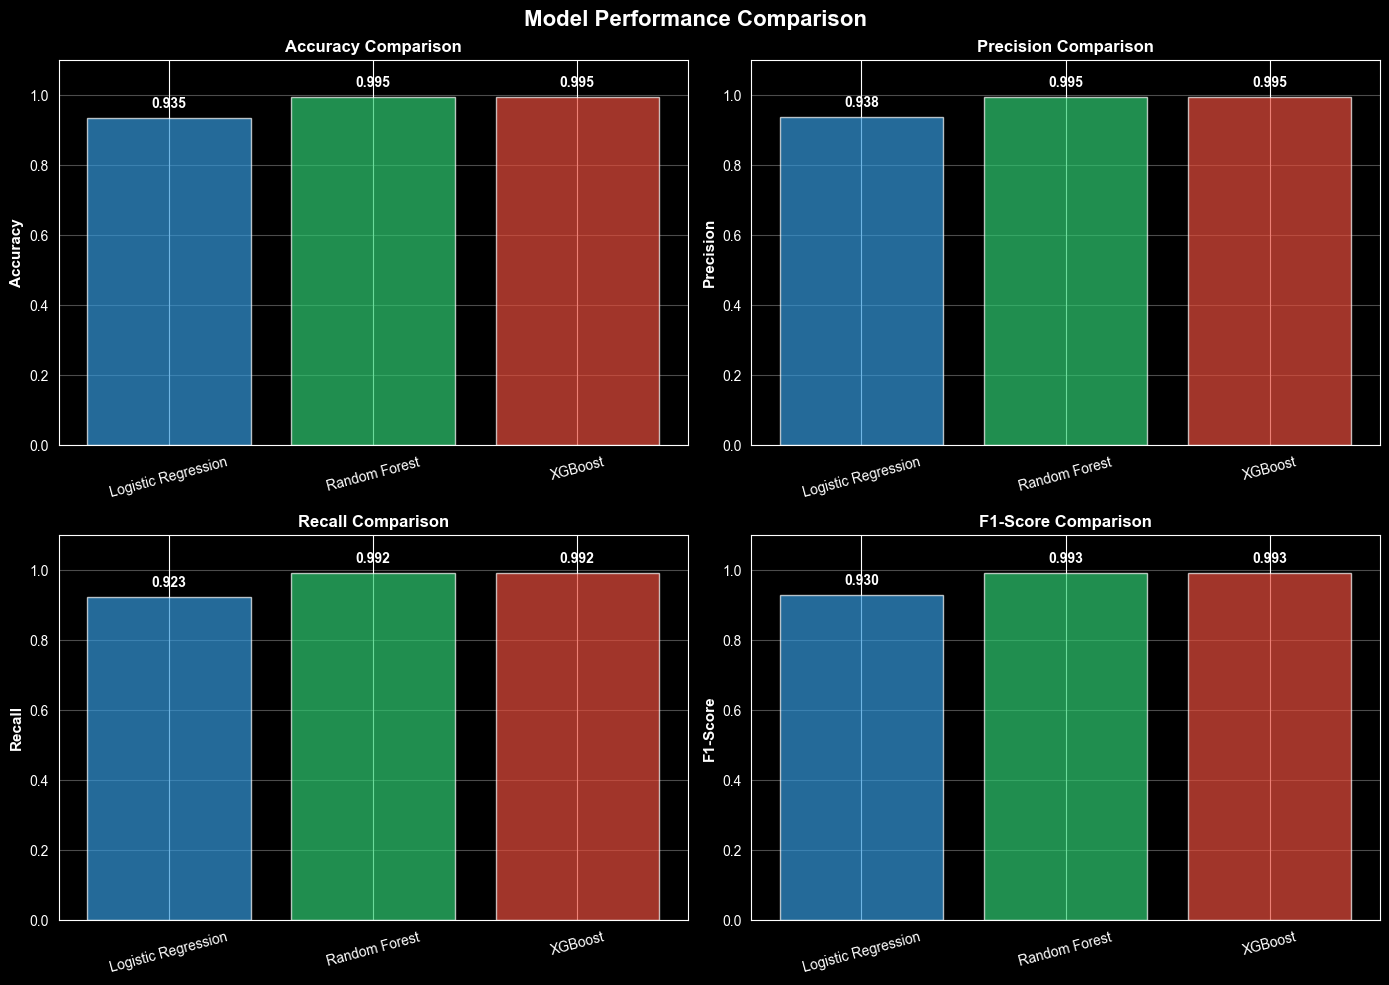

In [8]:
# Bar chart comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    col_name = metric if metric == 'Accuracy' else f'{metric.replace("-", "_")}_Macro'
    values = display_df[metric].values
    models = display_df['Model'].values
    
    bars = ax.bar(models, values, color=colors[:len(models)], alpha=0.7)
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.grid(alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Rotate x-labels if needed
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=300, bbox_inches='tight')
print('✓ Saved: model_comparison_metrics.png')
plt.show()

✓ Saved: model_comparison_radar.png


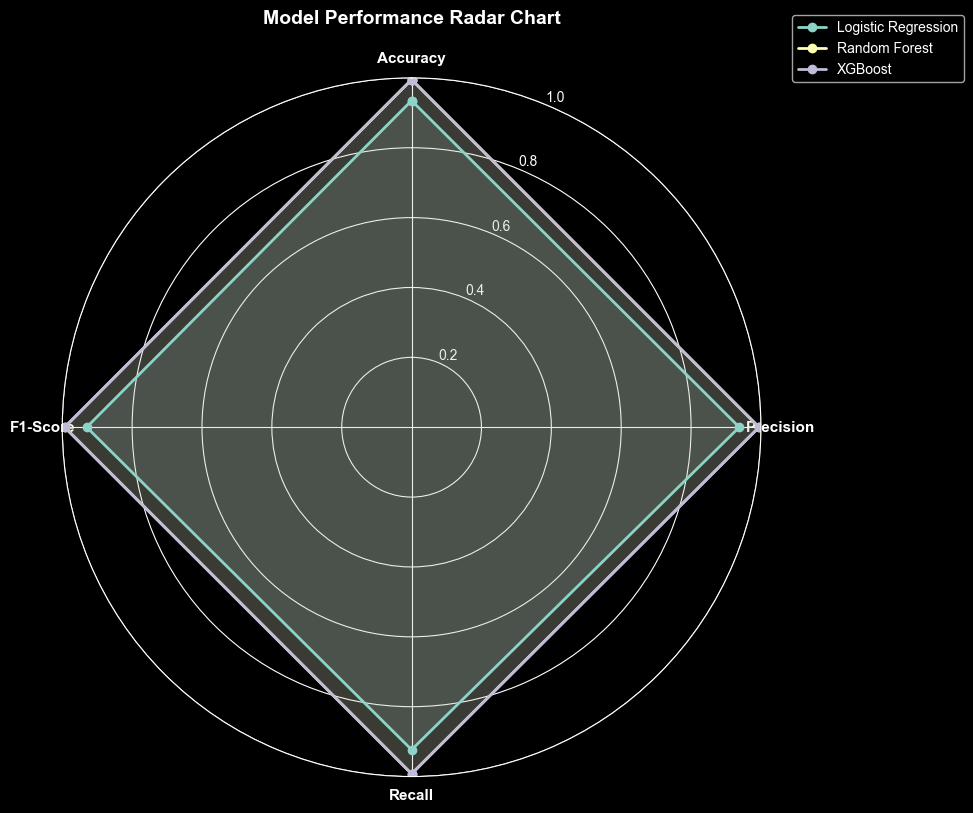

In [9]:
# Radar chart for overall comparison
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

metrics_radar = ['Accuracy', 'Precision_Macro', 'Recall_Macro', 'F1_Macro']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
ax.set_ylim(0, 1)

for idx, row in metrics_df.iterrows():
    values = [row[m] for m in metrics_radar]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax.fill(angles, values, alpha=0.15)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax.set_title('Model Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
ax.grid(True)

plt.tight_layout()
plt.savefig('model_comparison_radar.png', dpi=300, bbox_inches='tight')
print('✓ Saved: model_comparison_radar.png')
plt.show()

---
## Save Comparison Results

In [10]:
# Save complete metrics table
metrics_df.to_csv('model_comparison_metrics.csv', index=False)
print('✓ Saved: model_comparison_metrics.csv')

# Save summary table
display_df.to_csv('model_comparison_summary.csv', index=False)
print('✓ Saved: model_comparison_summary.csv')

✓ Saved: model_comparison_metrics.csv
✓ Saved: model_comparison_summary.csv


---
## Model Ranking

In [11]:
# Rank models by different metrics
print('\n' + '='*90)
print('MODEL RANKING BY METRIC')
print('='*90)

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ranked = display_df.sort_values(metric, ascending=False)
    print(f'\n{metric}:')
    for i, (idx, row) in enumerate(ranked.iterrows(), 1):
        print(f'  {i}. {row["Model"]}: {row[metric]:.4f}')


MODEL RANKING BY METRIC

Accuracy:
  1. Random Forest: 0.9950
  2. XGBoost: 0.9950
  3. Logistic Regression: 0.9350

Precision:
  1. Random Forest: 0.9945
  2. XGBoost: 0.9945
  3. Logistic Regression: 0.9380

Recall:
  1. Random Forest: 0.9922
  2. XGBoost: 0.9922
  3. Logistic Regression: 0.9232

F1-Score:
  1. Random Forest: 0.9933
  2. XGBoost: 0.9933
  3. Logistic Regression: 0.9300


---
## Key Insights

In [12]:
print('\n' + '='*90)
print('KEY INSIGHTS & RECOMMENDATIONS')
print('='*90)

# Find best performing model
best_acc = display_df.loc[display_df['Accuracy'].idxmax()]
best_f1 = display_df.loc[display_df['F1-Score'].idxmax()]

print(f'\n1. Best Overall Accuracy: {best_acc["Model"]} ({best_acc["Accuracy"]:.4f})')
print(f'2. Best F1-Score: {best_f1["Model"]} ({best_f1["F1-Score"]:.4f})')

# Calculate improvement
if len(display_df) > 1:
    sorted_acc = display_df.sort_values('Accuracy', ascending=False)
    improvement = (sorted_acc.iloc[0]['Accuracy'] - sorted_acc.iloc[-1]['Accuracy']) * 100
    print(f'\n3. Performance Improvement: {improvement:.2f}% from worst to best model')

print('\n4. Recommendations:')
if best_acc['Accuracy'] > 0.90:
    print('   ✓ Excellent performance achieved (>90% accuracy)')
    print(f'   → Deploy {best_acc["Model"]} for production')
elif best_acc['Accuracy'] > 0.80:
    print('   ✓ Good performance (80-90% accuracy)')
    print(f'   → Consider hyperparameter tuning for {best_acc["Model"]}')
else:
    print('   ⚠ Performance needs improvement (<80% accuracy)')
    print('   → Try feature engineering, hyperparameter tuning, or ensemble methods')

print('\n5. Model Selection:')
print(f'   • For deployment: {best_acc["Model"]} (highest accuracy)')
print(f'   • For interpretability: Logistic Regression (if included)')
print(f'   • For balance: {best_f1["Model"]} (best F1-score)')

print('\n' + '='*90)


KEY INSIGHTS & RECOMMENDATIONS

1. Best Overall Accuracy: Random Forest (0.9950)
2. Best F1-Score: Random Forest (0.9933)

3. Performance Improvement: 6.00% from worst to best model

4. Recommendations:
   ✓ Excellent performance achieved (>90% accuracy)
   → Deploy Random Forest for production

5. Model Selection:
   • For deployment: Random Forest (highest accuracy)
   • For interpretability: Logistic Regression (if included)
   • For balance: Random Forest (best F1-score)



---
## Summary

### Classification Metrics Explained:

- **Accuracy:** Overall correctness (correct predictions / total predictions)
- **Precision:** Of predicted positives, how many are actually positive (TP / (TP + FP))
- **Recall:** Of actual positives, how many were correctly predicted (TP / (TP + FN))
- **F1-Score:** Harmonic mean of precision and recall (2 * P * R / (P + R))

### Macro vs Weighted Averaging:

- **Macro:** Simple average across all classes (treats each class equally)
- **Weighted:** Average weighted by class support (accounts for class imbalance)

### Files Generated:
- model_comparison_metrics.csv (detailed metrics)
- model_comparison_summary.csv (summary table)
- model_comparison_metrics.png (bar charts)
- model_comparison_radar.png (radar chart)

### Next Steps:
1. Select best performing model
2. Perform hyperparameter tuning
3. Analyze misclassifications
4. Consider ensemble methods

---
**Model Comparison Complete!**